In [53]:
from qutip import basis, mcsolve, sigmax, sigmay, sigmaz, qeye,mesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # solo dos estados ahora

# Parámetros del sistema
Omega = 3.5     # Frecuencia de Rabi
g = 1     # Tasa de emisión espontánea

# Operador de colapso: solo uno para la emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg] 

# Hamiltoniano: sin términos de colapso adicionales
H = 0.5 * Omega * (Aeg + Age)





In [57]:
# Tiempo de simulación y lista de tiempo
tlist = np.linspace(0, 20, 100)

# Solución de Monte Carlo
MC1 = mcsolve(H, psi0, tlist, collapse, expect_values, ntraj=5000)

10.0%. Run time:  11.92s. Est. time left: 00:00:01:47
20.0%. Run time:  23.80s. Est. time left: 00:00:01:35
30.0%. Run time:  36.46s. Est. time left: 00:00:01:25
40.0%. Run time:  47.90s. Est. time left: 00:00:01:11
50.0%. Run time:  59.15s. Est. time left: 00:00:00:59
60.0%. Run time:  70.61s. Est. time left: 00:00:00:47
70.0%. Run time:  82.47s. Est. time left: 00:00:00:35
80.0%. Run time:  93.52s. Est. time left: 00:00:00:23
90.0%. Run time: 104.72s. Est. time left: 00:00:00:11
100.0%. Run time: 115.71s. Est. time left: 00:00:00:00
Total run time: 115.74s


In [22]:
tlist = np.linspace(0, 50, 50)
MC1= mesolve(H, psi0, tlist, collapse, expect_values)

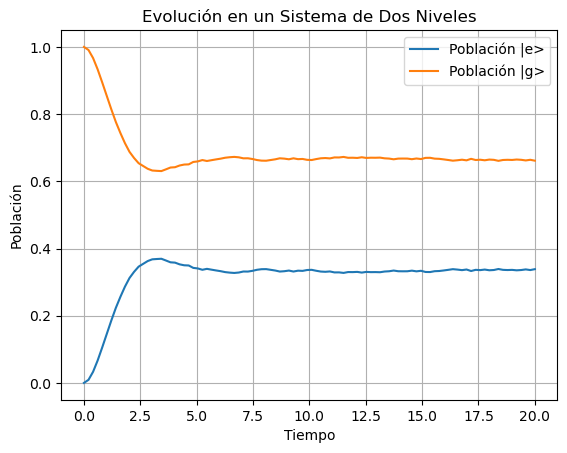

In [52]:
# Gráfica de población en estado excitado y base
plt.plot(tlist, MC1.expect[0], label=r'Población |e>')
plt.plot(tlist, MC1.expect[1], label=r'Población |g>')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title("Evolución en un Sistema de Dos Niveles")
plt.grid(True)
plt.show()


1.886185750912823
El primer colapso ocurrió en t = 1.89


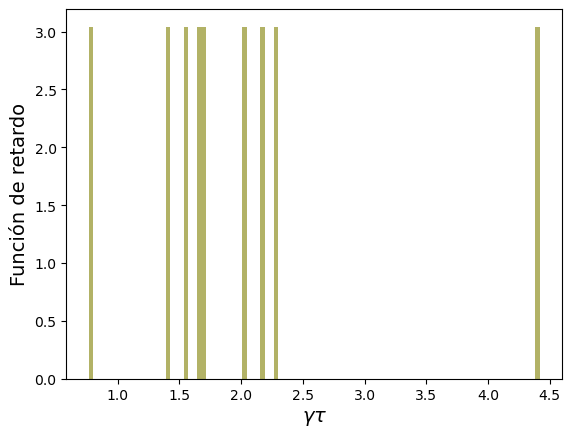

In [46]:
# Obtener los tiempos de colapso
collapse_times = MC1.col_times[0]  # La primera trayectoria


# Verificar si hubo colapsos y registrar el tiempo del primer colapso
if len(collapse_times) > 0:
    first_collapse_time = collapse_times[0]
    print(collapse_times[0])
    print(f"El primer colapso ocurrió en t = {first_collapse_time:.2f}")
else:
    print("No hubo colapsos durante la simulación.")

# Para visualizar el tiempo de espera entre colapsos (solo si hubiera más)
if len(collapse_times) > 1:
    waiting_times = np.diff(collapse_times)
    plt.hist(waiting_times, bins=100, density=True, alpha=0.6, color='olive')
    plt.xlabel(r"$\gamma \tau$", fontsize=14)
    plt.ylabel("Función de retardo", fontsize=14)
    plt.show()


19.857642132366156


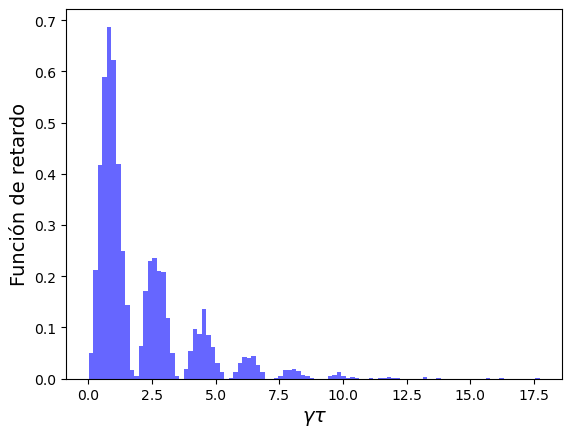

In [58]:
all_collapse_times = []
for traj in MC1.col_times:
    if len(traj) > 0:
        all_collapse_times.append(traj[0])  # Solo tomamos el primer colapso de cada trayectoria
print(max(collapse_times))
# Analiza los tiempos de espera del primer colapso
plt.hist(all_collapse_times, bins=100, density=True, alpha=0.6, color='blue')

plt.xlabel(r"$\gamma \tau$", fontsize=14)
plt.ylabel("Función de retardo", fontsize=14)
plt.show()